In [9]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, jaccard_score
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("../SistersLab-Project/PCOS_data.csv")

In [11]:
df = data.drop(["Sl. No", "Patient File No.",  "Unnamed: 44"], axis=1)

In [12]:
df.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)
df.rename(columns={'Marraige Status (Yrs)': 'Marriage Status (Yrs)'}, inplace=True)
df.rename(columns={'Pulse rate(bpm) ': 'Pulse rate(bpm)'}, inplace=True)
df.rename(columns={'II    beta-HCG(mIU/mL)': 'II_beta_HCG(mIU/mL)'}, inplace=True)
df.rename(columns={' Age (yrs)': 'Age (yrs)'}, inplace=True)
df.rename(columns={'  I   beta-HCG(mIU/mL)': 'I_beta_HCG(mIU/mL)'}, inplace=True)
df.rename(columns={'No. of abortions': 'No_of_abortions'}, inplace=True)
df.rename(columns={'BP _Systolic (mmHg)': 'BP_Systolic(mmHg)'}, inplace=True)
df.rename(columns={'BP _Diastolic (mmHg)': 'BP_Diastolic(mmHg)'}, inplace=True)
df.rename(columns={'Waist:Hip Ratio': 'WaistHip_Ratio'}, inplace=True)

In [13]:
df.loc[df['II_beta_HCG(mIU/mL)'] == '1.99.', 'II_beta_HCG(mIU/mL)'] = 1.99
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan # eksik değer
df['II_beta_HCG(mIU/mL)'] = pd.to_numeric(df['II_beta_HCG(mIU/mL)'], errors='coerce').astype('float64')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').astype('float64')

In [14]:
# df[df.index == 329]
df.drop(329, inplace=True);

In [15]:
df.isnull().sum()

PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marriage Status (Yrs)    1
Pregnant(Y/N)            0
No_of_abortions          0
I_beta_HCG(mIU/mL)       0
II_beta_HCG(mIU/mL)      0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
WaistHip_Ratio           0
TSH (mIU/L)              0
AMH(ng/mL)               1
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP_Systolic(mmHg)        0
BP_Diastolic(mmHg)       0
F

In [16]:
df["Marriage Status (Yrs)"].fillna(df["Marriage Status (Yrs)"].median(), inplace=True)
df["AMH(ng/mL)"].fillna(df["AMH(ng/mL)"].median(), inplace=True)
df["Fast food (Y/N)"].fillna(df["Fast food (Y/N)"].mode()[0], inplace=True)

In [17]:
df.drop(['I_beta_HCG(mIU/mL)', 'II_beta_HCG(mIU/mL)'],axis=1, inplace=True)

In [18]:
y = df[["PCOS (Y/N)"]]
X = df.drop("PCOS (Y/N)", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

Logistic Regression classification report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.91      0.83      0.87        35

    accuracy                           0.92       108
   macro avg       0.91      0.89      0.90       108
weighted avg       0.92      0.92      0.92       108



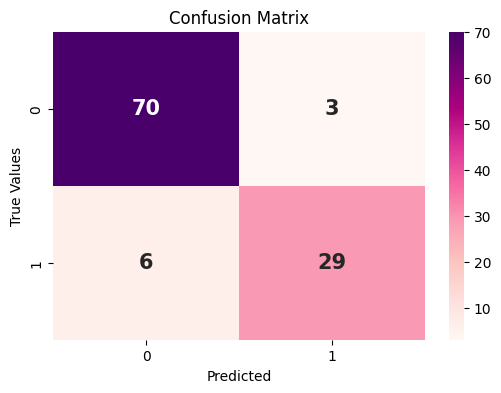

SVM classification report : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        73
           1       1.00      0.03      0.06        35

    accuracy                           0.69       108
   macro avg       0.84      0.51      0.43       108
weighted avg       0.79      0.69      0.57       108



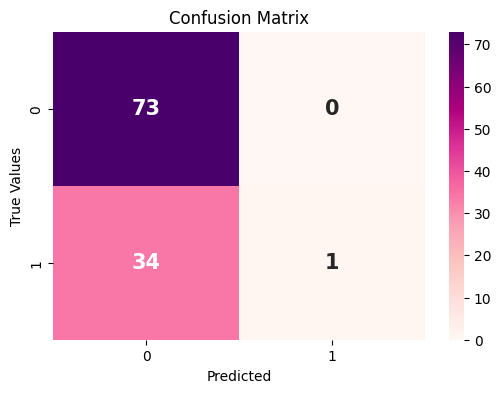

Decision Tree classification report : 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        73
           1       0.76      0.83      0.79        35

    accuracy                           0.86       108
   macro avg       0.84      0.85      0.84       108
weighted avg       0.87      0.86      0.86       108



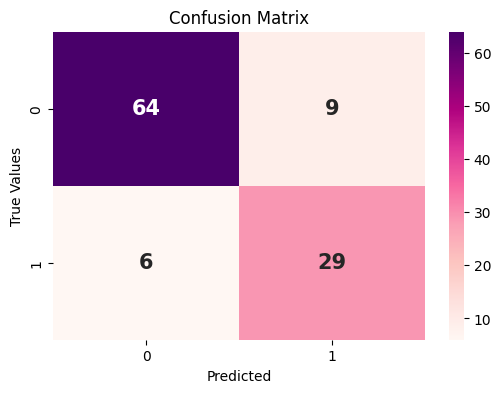

Random Forest classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.94      0.91      0.93        35

    accuracy                           0.95       108
   macro avg       0.95      0.94      0.95       108
weighted avg       0.95      0.95      0.95       108



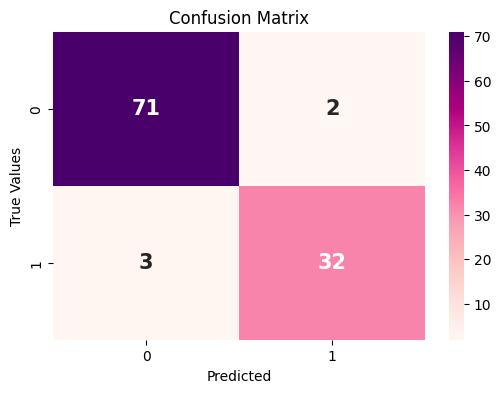

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 142, number of negative: 290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328704 -> initscore=-0.714054
[LightGBM] [Info] Start training from score -0.714054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

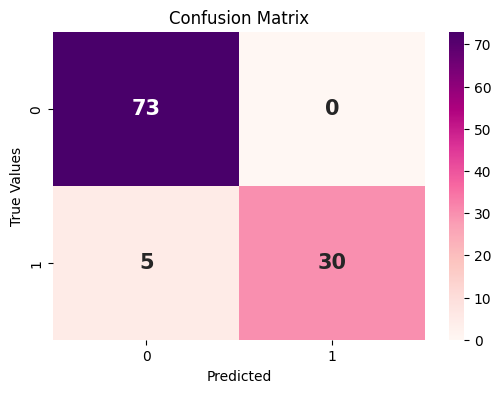

XGBoost classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.97      0.91      0.94        35

    accuracy                           0.96       108
   macro avg       0.96      0.95      0.96       108
weighted avg       0.96      0.96      0.96       108



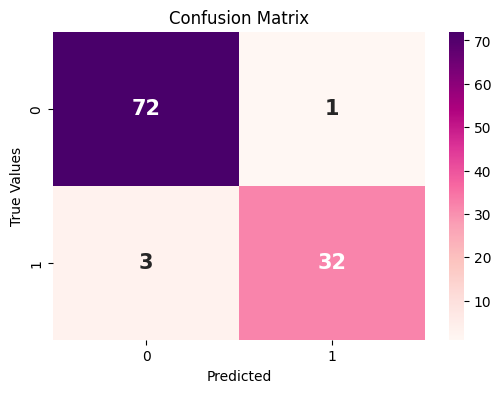

In [19]:
models = {'Logistic Regression': LogisticRegression(random_state=42),
          'SVM': SVC(random_state=42, probability=True),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'LightGBM': LGBMClassifier(random_state=42),
          'XGBoost': XGBClassifier(random_state=42)}

columns = ['Model', 'Test Accuracy', 'F1-Score', 'Jaccard Score', 'AUC Score', 'Precision', 'Recall']
result_df = pd.DataFrame(columns=columns)
results=[]

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, result_df):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    test_acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    jaccard = jaccard_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test,  model.predict_proba(X_test)[:,1])
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results.append([test_acc, precision, recall, f1, auc_score])


    # Confusion Matrix ve Classification Report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f"{model_name} classification report : \n {cr}" )

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=model.classes_, yticklabels=model.classes_, annot_kws={'size': 15, 'fontweight': 'semibold'})
    plt.xlabel('Predicted')
    plt.ylabel('True Values')
    plt.title('Confusion Matrix')
    plt.show()

    result_df = result_df._append({'Model': model_name,
                                   'Test Accuracy': test_acc,
                                   'Jaccard Score': jaccard,
                                   'AUC Score': auc_score,
                                   'Precision': precision,
                                   'Recall': recall,
                                   'F1-Score': f1}, ignore_index=True)

    return result_df

for model_name, model in models.items():
    result_df = evaluate_model(model, X_train, y_train, X_test, y_test, model_name, result_df)

In [20]:
result_df

,Model,Test Accuracy,F1-Score,Jaccard Score,AUC Score,Precision,Recall
0,Logistic Regression,0.916667,0.915640,0.763158,0.964384,0.916255,0.916667
1,SVM,0.685185,0.566255,0.028571,0.902544,0.785220,0.685185
2,Decision Tree,0.861111,0.862508,0.659091,0.852642,0.865309,0.861111
3,Random Forest,0.953704,0.953526,0.864865,0.986301,0.953534,0.953704
4,LightGBM,0.953704,0.952690,0.857143,0.981605,0.956671,0.953704
5,XGBoost,0.962963,0.962669,0.888889,0.986693,0.963143,0.962963
